# US - Baby Names

### Introduction:

We are going to use a subset of [US Baby Names](https://www.kaggle.com/kaggle/us-baby-names) from Kaggle.  
In the file it will be names from 2004 until 2014


### Step 1. Import the necessary libraries

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv). 

### Step 3. Assign it to a variable called baby_names.

In [14]:
url="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv"
baby_names=pd.read_csv(url,sep=",")

### Step 4. See the first 10 entries

In [15]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


### Step 5. Delete the column 'Unnamed: 0' and 'Id'

In [16]:
baby_names.drop(['Unnamed: 0','Id'],axis=1,inplace=True)
baby_names

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


### Step 6. Is there more male or female names in the dataset?

In [11]:
print(baby_names['Gender'].value_counts())
print("There is more female")

F    558846
M    457549
Name: Gender, dtype: int64
There is more female


### Step 7. Group the dataset by name and assign to names

In [17]:
names = baby_names.groupby('Name').first()
names

,Year,Gender,State,Count
Name,,,,
Aaban,2013,M,NY,6
Aadan,2008,M,CA,7
Aadarsh,2009,M,IL,5
Aaden,2007,M,AL,5
Aadhav,2014,M,CA,6
...,...,...,...,...
Zyra,2012,F,CA,6
Zyrah,2011,F,CA,5
Zyren,2013,M,TX,6


### Step 8. How many different names exist in the dataset?

In [8]:
baby_names['Name'].nunique()

17632

### Step 9. What is the name with most occurrences?

In [9]:
most_occurence=baby_names['Name'].value_counts().idxmax()
print("The name with most occurence is",most_occurence)

The name with most occurence is Riley


### Step 10. How many different names have the least occurrences?

In [10]:
name_counts = baby_names['Name'].value_counts()
min_count = name_counts.min()
least_frequent_names = name_counts[name_counts == min_count]
num_least_frequent_names = least_frequent_names.count()
print(num_least_frequent_names)

3682


### Step 11. What is the median name occurrence?

In [11]:
median_count = baby_names['Name'].value_counts().median()
# print the result
print('The median name occurrence in the dataset is:', median_count)

The median name occurrence in the dataset is: 8.0


### Step 12. What is the standard deviation of names?

In [12]:
std_value = baby_names['Name'].value_counts().std()
# print the result
print('The standard deviation of  name in the dataset is:', std_value)

The standard deviation of  name in the dataset is: 122.02996350814088


### Step 13. Get a summary with the mean, min, max, std and quartiles.

In [13]:
baby_names.describe()

,Year,Count
count,1.016395e+06,1.016395e+06
mean,2.009053e+03,3.485012e+01
std,3.138293e+00,9.739735e+01
min,2.004000e+03,5.000000e+00
25%,2.006000e+03,7.000000e+00
50%,2.009000e+03,1.100000e+01
75%,2.012000e+03,2.600000e+01
max,2.014000e+03,4.167000e+03


Extra Question : Find Categorical/ Numerical Data.

In [18]:
categorical_columns = baby_names.select_dtypes(include=['object']).columns.tolist()
numerical_columns = baby_names.select_dtypes(include=['int','float']).columns.tolist()
print("Categorical Columns = ", categorical_columns, "\n Numerical Columns = ", numerical_columns)

Categorical Columns =  ['Name', 'Gender', 'State'] 
 Numerical Columns =  ['Year', 'Count']


Find Outliners

In [19]:
baby_names['Name'].value_counts()

Riley      1112
Avery      1080
Jordan     1073
Peyton     1064
Hayden     1049
           ... 
Terryn        1
Yanna         1
Zemirah       1
Emmilyn       1
Coalton       1
Name: Name, Length: 17632, dtype: int64

In [20]:
baby_names['Name'].value_counts().describe()

count    17632.000000
mean        57.644907
std        122.029964
min          1.000000
25%          2.000000
50%          8.000000
75%         39.000000
max       1112.000000
Name: Name, dtype: float64

Obeservation: Outlier in this data is that the count of baby names is significantly higher for few names..Most of the names has lower count in the US.

Extra Question : Find Skewness.

Observation: The baby name count is Right Skewed as 75% of baby names count is les than 40.

Write 5 Observations.

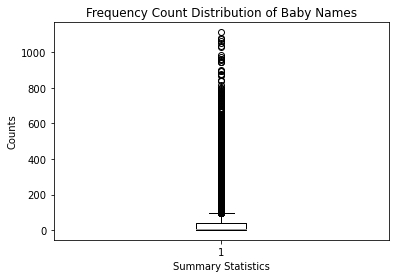

In [21]:
import matplotlib.pyplot as plt

name_counts = baby_names['Name'].value_counts()
name_counts_desc = name_counts.describe()

plt.boxplot(name_counts)
plt.title('Frequency Count Distribution of Baby Names')
plt.xlabel('Summary Statistics')
plt.ylabel('Counts')
plt.show()

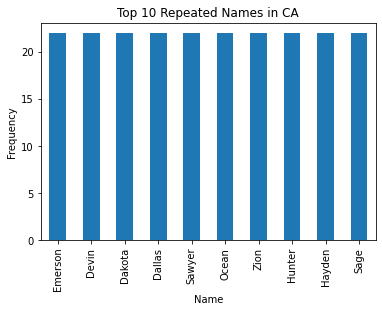

In [22]:
name_counts = baby_names.groupby(['State', 'Name'])['Name'].count()
most_repeats = name_counts.groupby('State').sum().idxmax()
name_counts[most_repeats].sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Top 10 Repeated Names in {}'.format(most_repeats))
plt.xlabel('Name')
plt.ylabel('Frequency')
plt.show()

In [23]:
name_counts.groupby('State').sum()

State
AK     4991
AL    18297
AR    13646
AZ    25338
CA    76781
CO    20607
CT    12308
DC     6053
DE     4989
FL    45851
GA    34839
HI     6801
IA    13438
ID     9751
IL    38096
IN    23669
KS    14501
KY    16084
LA    20186
MA    19189
MD    20759
ME     5753
MI    29281
MN    19681
MO    21865
MS    14097
MT     5676
NC    30887
ND     4980
NE    10399
NH     5616
NJ    27315
NM    10687
NV    13116
NY    50743
OH    32461
OK    17657
OR    15937
PA    31651
RI     5026
SC    17660
SD     5746
TN    23651
TX    67551
UT    17748
VA    26756
VT     3016
WA    24378
WI    19489
WV     8038
WY     3360
Name: Name, dtype: int64

<AxesSubplot:>

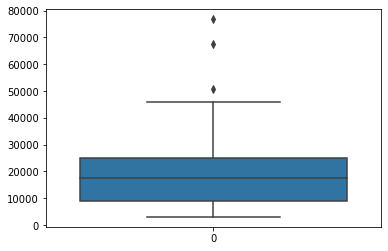

In [24]:
import seaborn as sns

sns.boxplot(data=name_counts.groupby('State').sum())

In [25]:
name_counts.groupby('State').sum().sort_values().head(5)

State
VT    3016
WY    3360
ND    4980
DE    4989
AK    4991
Name: Name, dtype: int64

In [26]:
name_counts.groupby('State').sum().idxmax()

'CA'

State which has most repeating name is CA and VT has the least.

In [27]:
girls = baby_names[baby_names['Gender']== 'F']
boys = baby_names[baby_names['Gender']== 'M']
girls['Year'].describe()

count    558846.000000
mean       2009.026258
std           3.137428
min        2004.000000
25%        2006.000000
50%        2009.000000
75%        2012.000000
max        2014.000000
Name: Year, dtype: float64

In [28]:
boys['Year'].describe()

count    457549.000000
mean       2009.086085
std           3.139039
min        2004.000000
25%        2006.000000
50%        2009.000000
75%        2012.000000
max        2014.000000
Name: Year, dtype: float64

In [29]:
common_names = set(boys['Name'].unique()) & set(girls['Name'].unique())

In [30]:
len(common_names)

1309

There are 1309 common names shared by gender. 

In [31]:
baby_names.loc[(baby_names['Name'] == 'Kaleb') & (baby_names['Gender'] == 'F')]

,Name,Year,Gender,State,Count
370363,Kaleb,2004,F,KY,11


In [32]:
baby_names.loc[(baby_names['Name'] == 'Kaleb') & (baby_names['Gender'] == 'M')]

,Name,Year,Gender,State,Count
2468,Kaleb,2004,M,AK,17
2669,Kaleb,2005,M,AK,19
2892,Kaleb,2006,M,AK,17
3132,Kaleb,2007,M,AK,14
3377,Kaleb,2008,M,AK,11
...,...,...,...,...,...
1015621,Kaleb,2010,M,WY,8
1015762,Kaleb,2011,M,WY,13
1015938,Kaleb,2012,M,WY,11
1016203,Kaleb,2013,M,WY,5


Female names count is more compared to male names in this dataset

In [33]:
name_state_counts = baby_names.groupby('Name')['State'].nunique()
name_state_counts.idxmax()

'Aaliyah'

Aaliyah is the most name used in most state